# Run SurvTRACE on METABRIC dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os, sys
sys.path.append(os.path.abspath('../SurvTRACE'))

In [3]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from survtrace.dataset import load_data
from survtrace.evaluate_utils import Evaluator
from survtrace.utils import set_random_seed
from survtrace.model import SurvTraceSingle
from survtrace.train_utils import Trainer
from survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'metabric'

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 64,
    'weight_decay': 1e-4,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [4]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)

# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],)

use pytorch-cuda for training.
[Train-0]: 31.40474534034729
[Val-0]: 1.2558883428573608
[Train-1]: 24.924683809280396
[Val-1]: 1.1245657205581665
[Train-2]: 21.820661962032318
[Val-2]: 1.0441442728042603
[Train-3]: 21.50649893283844
[Val-3]: 1.0285943746566772
[Train-4]: 21.398138284683228
[Val-4]: 1.0295584201812744
EarlyStopping counter: 1 out of 5
[Train-5]: 21.221526741981506
[Val-5]: 1.0312020778656006
EarlyStopping counter: 2 out of 5
[Train-6]: 21.345574736595154
[Val-6]: 1.0420151948928833
EarlyStopping counter: 3 out of 5
[Train-7]: 21.233961820602417
[Val-7]: 1.041510820388794
EarlyStopping counter: 4 out of 5
[Train-8]: 21.23059344291687
[Val-8]: 1.0153557062149048
[Train-9]: 21.10378849506378
[Val-9]: 1.0454771518707275
EarlyStopping counter: 1 out of 5
[Train-10]: 21.15115463733673
[Val-10]: 1.0404484272003174
EarlyStopping counter: 2 out of 5
[Train-11]: 21.27986764907837
[Val-11]: 1.0320121049880981
EarlyStopping counter: 3 out of 5
[Train-12]: 21.157684087753296
[Val-12

In [5]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test), confidence=.95, nb_bootstrap=100)
print("done")

******************************
start evaluation
******************************
C-td:  0.39399017296713906
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7382687046764163
Brier Score: 0.1043232450737917
Dynamic AUC:  0.7549171293372731
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7050881836586336
Brier Score: 0.16964387792844557
Dynamic AUC:  0.7315945762233158
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6801134655176442
Brier Score: 0.2186105119111368
Dynamic AUC:  0.7224654767076873
C-td:  0.423391295533501
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7557473556232666
Brier Score: 0.10301819002496305
Dynamic AUC:  0.7677487993444672
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7490597316212618
Brier Score: 0.1593045055972303
Dynamic AUC:  0.7822023015998185
For 0.75 quantile,
TD Concordance Index - IPCW: 0.7208966927135881
Brier Score: 0.19849903371562208
Dynamic AUC:  0.7728801410856165
C-td:  0.4322967252469351
For 0.25 quantile,
TD Concordance Index - IPCW: 0.

C-td:  0.44356107885168505
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6838586129354656
Brier Score: 0.09230272178715034
Dynamic AUC:  0.6949153961605409
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6922816161692814
Brier Score: 0.17088110134956577
Dynamic AUC:  0.7179612057034399
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6644665057396111
Brier Score: 0.23256673539930367
Dynamic AUC:  0.7080323651604254
C-td:  0.3712666679134484
For 0.25 quantile,
TD Concordance Index - IPCW: 0.75514607227561
Brier Score: 0.10973897409836739
Dynamic AUC:  0.7735706017174632
For 0.5 quantile,
TD Concordance Index - IPCW: 0.715550764857545
Brier Score: 0.1688015301476404
Dynamic AUC:  0.7345160270934883
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6849260673508346
Brier Score: 0.21130385877922317
Dynamic AUC:  0.7342420565172345
C-td:  0.3722764323222823
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7326997347075029
Brier Score: 0.11055532961420424
Dynamic AUC:  0.7462043541898

C-td:  0.34503297170814723
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7049542728289603
Brier Score: 0.12706416054492314
Dynamic AUC:  0.7182160831114246
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6909769497871153
Brier Score: 0.18873623905775788
Dynamic AUC:  0.7151248773134815
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6501674199161482
Brier Score: 0.22843423794592074
Dynamic AUC:  0.6835054112431647
C-td:  0.3806376476911898
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7868745968366987
Brier Score: 0.10222398156089042
Dynamic AUC:  0.802418656708794
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7573421164616156
Brier Score: 0.1540280060703847
Dynamic AUC:  0.7837052706487941
For 0.75 quantile,
TD Concordance Index - IPCW: 0.7152437496468728
Brier Score: 0.18747481949304792
Dynamic AUC:  0.7661359733291622
C-td:  0.37667788407002684
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7527388404830452
Brier Score: 0.10678333427758233
Dynamic AUC:  0.7706909634

For 0.25 quantile,
TD Concordance Index - IPCW: 0.7080574282869998
Brier Score: 0.10519185343854974
Dynamic AUC:  0.7205384633578947
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7074836000826805
Brier Score: 0.1735824056207552
Dynamic AUC:  0.7349926309423941
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6795335159200238
Brier Score: 0.21930270362410512
Dynamic AUC:  0.721301523015067
C-td:  0.3538794220407288
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6907490393137793
Brier Score: 0.1229076888928568
Dynamic AUC:  0.7044361612157952
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6605180063539128
Brier Score: 0.1947448289556786
Dynamic AUC:  0.6759894056647843
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6568558652977908
Brier Score: 0.2363467154959401
Dynamic AUC:  0.6950040812347833
C-td:  0.40142484239094584
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7585314470809543
Brier Score: 0.09412371027874962
Dynamic AUC:  0.7773210394070577
For 0.5 quantile,
TD Co

For 0.25 quantile,
TD Concordance Index - IPCW: 0.7034104017422926
Brier Score: 0.11659138659319232
Dynamic AUC:  0.7200525839086865
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6731468142230832
Brier Score: 0.1874900963703308
Dynamic AUC:  0.6948097876245578
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6955286785957279
Brier Score: 0.20536024509312092
Dynamic AUC:  0.7695196565356104
C-td:  0.39031596146904035
For 0.25 quantile,
TD Concordance Index - IPCW: 0.75611054458564
Brier Score: 0.10950522299762337
Dynamic AUC:  0.7770109391038397
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7379487639767195
Brier Score: 0.1646674582916568
Dynamic AUC:  0.7782778125278391
For 0.75 quantile,
TD Concordance Index - IPCW: 0.7119996803670676
Brier Score: 0.19453341417730508
Dynamic AUC:  0.7806834394798181
C-td:  0.44301113770423833
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7765840930047616
Brier Score: 0.0914459509736089
Dynamic AUC:  0.7869739791529705
For 0.5 quantile,
TD C

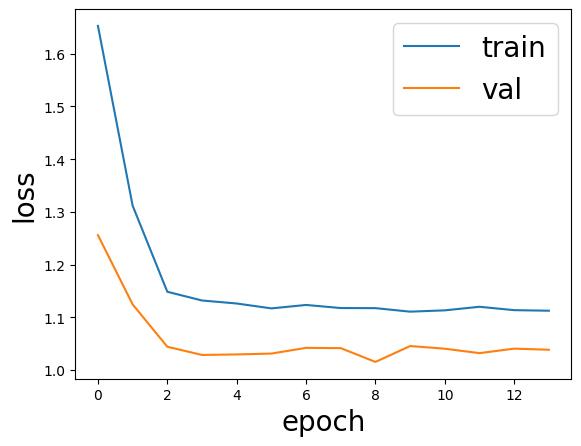

In [6]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()